<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-Karakostasz/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Karakostas Zacharias


**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

    The goal of the project was to use Python and NetworkX to build a greedy method for solving the Traveling Salesperson Problem. The first design comprised a simple class structure for data extraction, graph generation, and visualization. Throughout development, the design expanded to incorporate complete tests embedded in each function, utilizing both assert and print statements for improved traceability and debugging. The end product is a functional TSP solver that correctly calculates and visualizes a route using the Greedy algorithm. The development process lasted about 6-8 hours, including initial planning, coding, testing, and debugging.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

    This was given to us as an individual assignment, so I was working on alone in the whole project.

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

    The most major issues involved dealing with edges in which the Greedy algorithm did not yield the proper or optimal route due to intrinsic restrictions. Furthermore, executing the distance calculation efficiently and guaranteeing that all nodes were visited exactly once necessitated meticulous attention to detail. Debugging the integration of route calculation and graph presentation was very difficult, particularly when ensuring that edges were accurately constructed based on estimated distances.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

    One major innovation was the inclusion of both assert and print statements in each function. This dual-layer testing provided immediate feedback on the correctness of each component of the implementation, which greatly aided debugging and refining the code. Another innovation was the dynamic way to calculating the nearest neighbor, which improved the route selection process in the Greedy algorithm.

**TESTING**: Describe how you tested this work.

    Assert statements were used within each function to validate critical components such as data extraction, distance calculation, route design, and graph creation. Each assert was accompanied by a print statement that either confirmed successful execution or highlighted failure.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

    - The Greedy algorithm does not guarantee an optimal solution in genral (hueristic) and may occasionally generate poor routes.
    - When dealing with enormous datasets, visualization might become cluttered and difficult to interpret.
    - Some edge circumstances may not be handled effectively due to the greedy approach's simplicity.
    - In some more rare circumstances, floating-point imperfections may have a minor impact on distance estimations.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

    Overall, this lab provided a good opportunity to grasp the Greedy algorithm's strengths and limits while addressing NP-hard problems such as the TSP. The incorporation of testing tools right into the code proved to be an extremely useful strategy for debugging and validating each stage. While the Greedy technique has limits, particularly in terms of ensuring the best solution, the exercise provided valuable insight on heuristic problem-solving methods. The whole lab, in general, demonstrated the value of extensive testing and collaborative programming methodologies.

## Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [2]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

extractData: Passed - Extracted 6 nodes.
setUpCoords: Passed - Set up 6 coordinates.
addNodes: Passed - Added 6 nodes to the graph.
calculateDistance: Passed - Distance between (1, 5) and (3, 7) is 2.8284271247461903.
calculateDistance: Passed - Distance between (1, 5) and (5, 11) is 7.211102550927978.
calculateDistance: Passed - Distance between (1, 5) and (3, 5) is 2.0.
calculateDistance: Passed - Distance between (1, 5) and (5, 7) is 4.47213595499958.
calculateDistance: Passed - Distance between (1, 5) and (7, 9) is 7.211102550927978.
calculateDistance: Passed - Distance between (3, 5) and (3, 7) is 2.0.
calculateDistance: Passed - Distance between (3, 5) and (5, 11) is 6.324555320336759.
calculateDistance: Passed - Distance between (3, 5) and (5, 7) is 2.8284271247461903.
calculateDistance: Passed - Distance between (3, 5) and (7, 9) is 5.656854249492381.
calculateDistance: Passed - Distance between (3, 7) and (5, 11) is 4.47213595499958.
calculateDistance: Passed - Distance betwee

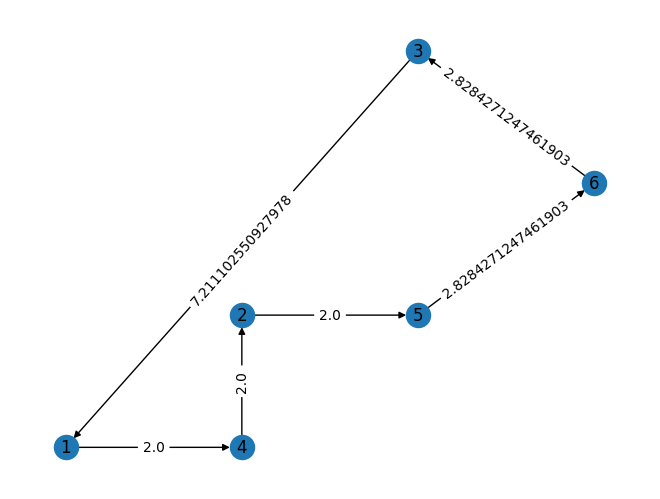

In [16]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = []

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})

        pass
        #FIXME complete this function
        """
        lines = inputFile.strip().split("\n")
        self.dimension = int(lines[0])  # First line contains the number of nodes
        for i in range(1, self.dimension + 1):
            x, y = map(int, lines[i].split())
            self.nodeData.append((i, x, y))

        # Test to check if data is extracted correctly
        assert len(self.nodeData) == self.dimension, "Data extraction failed the exquisite algorithm: there is an incorrect number of nodes in the list"
        print(f"extractData: Passed - Extracted {len(self.nodeData)} nodes.")

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key

        pass
        #FIXME complete this function
        """

        for node in self.nodeData:
            self.coords[node[0]] = (node[1], node[2])

        # Test to ensure coordinates are correctly set up
        assert len(self.coords) == self.dimension, "Coordinate setup failed :( - mismatch in the  number of coordinates"
        print(f"setUpCoords: Passed - Set up {len(self.coords)} coordinates.")


    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula

        pass
        #FIXME complete this function
        """
        distance = math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

        # Test to check the distance calculation
        assert isinstance(distance, float) and distance >= 0, "The Distance calculation failed: invalid distance calc"
        print(f"calculateDistance Passed -- Distance between {a} and {b} is {distance}.")
        return distance

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})

        pass
        #FIXME complete this function
        """

        if needList:
            nVisits = list(self.coords.keys())
            nVisits.remove(current)
        visits.append(current)

        while nVisits:
            nearest = min(nVisits, key=lambda x: self.calculateDistance(self.coords[current], self.coords[x]))
            current = nearest
            visits.append(current)
            nVisits.remove(current)

        self.route = visits

        # Test to ensure all nodes are visited
        assert len(self.route) == self.dimension, "The Route calculation failed me again: not all nodes are visited"
        print(f"getRoute: Passed, Route calculated with {len(self.route)} nodes visited.")
        return visits

    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm

        pass
        #FIXME complete this function
        """

        self.route = self.getRoute(start)
        self.route.append(start)  # Complete the cycle by returning to the starting node

        # Test to ensure the route forms a cycle
        assert self.route[0] == self.route[-1], "Greedy algorithm failed us brother: THe route does not form a cycle"
        print(f"beGreedy: Passed -- Route forms a cycle starting and ending at node {start}.")


    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
       pass
        #FIXME complete this function
       """

        places = list(self.coords.keys())

        # Test to check if all nodes are listed
        assert len(places) == self.dimension, "Listing places failed: Ther is a mismatch in the number of nodes"
        print(f"list of Places: Passed - Listed {len(places)} places.")
        return places

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

        print(f"addNodes: Passed - Added {len(self.graph.nodes)} nodes to the graph.")

    def addEdges(self):
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()


main()